In [1]:
import tensorflow as tf

In [2]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import Sequential
     

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

     

In [4]:

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')

])
     

In [5]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [6]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)
     

In [7]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6381 - accuracy: 0.8366 - val_loss: 0.3409 - val_accuracy: 0.9106
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3403 - accuracy: 0.9034 - val_loss: 0.2752 - val_accuracy: 0.9227
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2861 - accuracy: 0.9193 - val_loss: 0.2403 - val_accuracy: 0.9332
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2535 - accuracy: 0.9285 - val_loss: 0.2180 - val_accuracy: 0.9385
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2276 - accuracy: 0.9354 - val_loss: 0.1984 - val_accuracy: 0.9443
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2090 - accuracy: 0.9420 - val_loss: 0.1818 - val_accuracy: 0.9492
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1926 - accuracy: 0.9466 - val_loss: 0.1700 - val_ac

In [8]:
%load_ext tensorboard

In [9]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 7308), started 0:05:56 ago. (Use '!kill 7308' to kill it.)

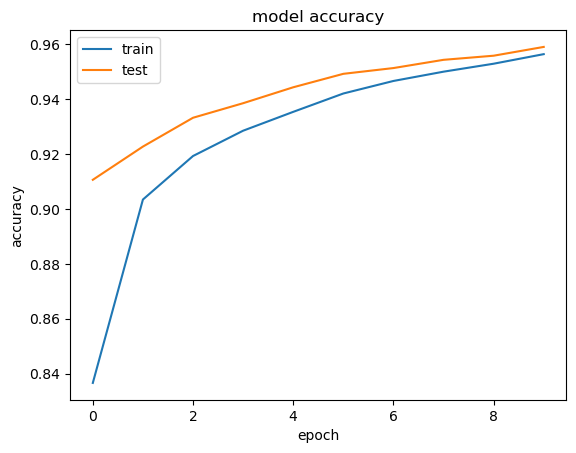

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()